## **Importing Libraries**

In [ ]:
%%capture
!pip install mordred
!pip install rdkit


In [ ]:
# Importing Libraries
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw, PandasTools, AllChem

import mordred
from mordred import Calculator, descriptors


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

pd.set_option('display.max_columns', 2000)
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, BayesianRidge, ElasticNetCV, SGDRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR

In [ ]:
sns.set(style='whitegrid')

## **Dataset and descriptors**

Youtube videos for generating molecular descriptors from SMILES

> https://youtu.be/EeOCGvy2pmQ


> https://youtu.be/Sgh-qJVYI5Q





In [ ]:
data = pd.read_csv('delaney.csv')
data.head()

Compound ID  measured log(solubility:mol/L)  \
0       1,1,1,2-Tetrachloroethane                           -2.18   
1           1,1,1-Trichloroethane                           -2.00   
2       1,1,2,2-Tetrachloroethane                           -1.74   
3           1,1,2-Trichloroethane                           -1.48   
4  1,1,2-Trichlorotrifluoroethane                           -3.04   

   ESOL predicted log(solubility:mol/L)               SMILES  
0                                -2.794       ClCC(Cl)(Cl)Cl  
1                                -2.232         CC(Cl)(Cl)Cl  
2                                -2.549       ClC(Cl)C(Cl)Cl  
3                                -1.961           ClCC(Cl)Cl  
4                                -3.077  FC(F)(Cl)C(F)(Cl)Cl

In [ ]:
mol_list = []

for smile in data['SMILES']:
  mol = Chem.MolFromSmiles(smile)
  mol = Chem.AddHs(mol)
  AllChem.EmbedMolecule(mol)
  mol_list.append(mol)

data = pd.concat([data, pd.DataFrame(mol_list, columns = (['Mol']))], axis=1)

In [ ]:
# Creating a descriptor calculator with all descriptors
calc = Calculator(descriptors, ignore_3D=False)

all_desc = calc.pandas(data['Mol'])

In [ ]:
df_index = data[['Compound ID', 'SMILES', 'measured log(solubility:mol/L)']]

In [ ]:
df = pd.concat([df_index, all_desc], axis=1)
df.head()

In [ ]:
df.to_excel('delaney_mordred.xlsx', index=None)

## **Loading the Dataset**

In [ ]:
df = pd.read_excel('delaney_mordred.xlsx')

In [ ]:
df.head()

Compound ID               SMILES  \
0       1,1,1,2-Tetrachloroethane       ClCC(Cl)(Cl)Cl   
1           1,1,1-Trichloroethane         CC(Cl)(Cl)Cl   
2       1,1,2,2-Tetrachloroethane       ClC(Cl)C(Cl)Cl   
3           1,1,2-Trichloroethane           ClCC(Cl)Cl   
4  1,1,2-Trichlorotrifluoroethane  FC(F)(Cl)C(F)(Cl)Cl   

   measured log(solubility:mol/L)       ABC     ABCGG  nAcid  nBase   SpAbs_A  \
0                           -2.18  4.012290  4.284816      0      0  5.818626   
1                           -2.00  3.464102  3.464102      0      0  4.000000   
2                           -1.74  3.932653  4.244375      0      0  6.000000   
3                           -1.48  3.047207  3.305183      0      0  5.226252   
4                           -3.04  5.808525  6.167293      0      0  7.211103   

    SpMax_A  SpDiam_A    SpAD_A   SpMAD_A   LogEE_A     VE1_A     VE2_A  \
0  2.074313  4.148627  5.818626  0.969771  2.626363  2.285500  0.380917   
1  2.000000  4.000000  4.000000  0.800000  2.444466  2.121320  0.424264   
2  2.000000  4.000000  6.000000  1.000000  2.610845  2.309401  0.384900   
3  1.847759  3.695518  5.226252  1.045250  2.408576  2.130986  0.426197   
4  2.302776  4.605551  7.211103  0.901388  2.947233  2.602595  0.325324   

      VE3_A      VR1_A     VR2_A     VR3_A  nAromAtom  nAromBond  nAtom  \
0  0.315759  11.637367  1.939561  1.943396          0          0      8   
1  0.058892   8.000000  1.600000  1.386294          0          0      8   
2  0.326163  11.530010  1.921668  1.934128          0          0      8   
3  0.063438   8.629874  1.725975  1.462083          0          0      8   
4  0.733365  17.881697  2.235212  2.660634          0          0      8   

   nHeavyAtom  nSpiro  nBridgehead  nHetero  nH  nB  nC  nN  nO  nS  nP  nF  \
0           6       0            0        4   2   0   2   0   0   0   0   0   
1           5       0            0        3   3   0   2   0   0   0   0   0   
2           6       0            0        4   2   0   2   0   0   0   0   0   
3           5       0            0        3   3   0   2   0   0   0   0   0   
4           8       0            0        6   0   0   2   0   0   0   0   3   

   nCl  nBr  nI  nX      ATS0dv      ATS1dv      ATS2dv      ATS3dv  ATS4dv  \
0    4    0   0   4   22.419753   18.888889    9.592593    1.814815     0.0   
1    3    0   0   3   18.814815   13.333333    4.148148    0.000000     0.0   
2    4    0   0   4   20.419753   18.333333   10.543210    2.419753     0.0   
3    3    0   0   3   14.814815   12.222222    6.049383    1.209877     0.0   
4    3    0   0   6  180.814815  109.333333  164.716049  126.432099     0.0   

   ATS5dv  ATS6dv  ATS7dv  ATS8dv  ATS0d  ATS1d  ATS2d  ATS3d  ATS4d  ATS5d  \
0     0.0     0.0     0.0     0.0     26     26     24      9      0      0   
1     0.0     0.0     0.0     0.0     23     19     21      9      0      0   
2     0.0     0.0     0.0     0.0     24     27     24      9      0      0   
3     0.0     0.0     0.0     0.0     19     21     21      9      0      0   
4     0.0     0.0     0.0     0.0     38     40     30      9      0      0   

   ATS6d  ATS7d  ATS8d       ATS0s      ATS1s       ATS2s       ATS3s ATS4s  \
0      0      0      0   13.055908  11.939815   19.361568    13.50663     0   
1      0      0      0   13.995056  13.546296    20.25663   12.111111     0   
2      0      0      0   12.798964  11.621399   18.848041   13.626124     0   
3      0      0      0   12.460334  11.940329    18.19151   12.350099     0   
4      0      0      0  200.557556  36.608796  143.918877  185.448865     0   

  ATS5s ATS6s ATS7s ATS8s  ATS0Z  ATS1Z  ATS2Z  ATS3Z  ATS4Z  ATS5Z  ATS6Z  \
0     0     0     0     0   1230    456   1322    969      0      0      0   
1     0     0     0     0    942    360   1194    153      0      0      0   
2     0     0     0     0   1230    456   1066   1225      0      0      0   
3     0     0     0     0    942    360    682    665      0      0     

In [ ]:
df.shape

(1144, 1829)

## **Data Preprocessing**
https://youtu.be/2esT6rYuV_g


1.   Removing missing values/non-numerical values
2.   Remove constant values
3.   Remove highly correlated values





In [ ]:
df.head()

In [ ]:
data = df.iloc[:,3:]

In [ ]:
data.head()

ABC     ABCGG  nAcid  nBase   SpAbs_A   SpMax_A  SpDiam_A    SpAD_A  \
0  4.012290  4.284816      0      0  5.818626  2.074313  4.148627  5.818626   
1  3.464102  3.464102      0      0  4.000000  2.000000  4.000000  4.000000   
2  3.932653  4.244375      0      0  6.000000  2.000000  4.000000  6.000000   
3  3.047207  3.305183      0      0  5.226252  1.847759  3.695518  5.226252   
4  5.808525  6.167293      0      0  7.211103  2.302776  4.605551  7.211103   

    SpMAD_A   LogEE_A     VE1_A     VE2_A     VE3_A      VR1_A     VR2_A  \
0  0.969771  2.626363  2.285500  0.380917  0.315759  11.637367  1.939561   
1  0.800000  2.444466  2.121320  0.424264  0.058892   8.000000  1.600000   
2  1.000000  2.610845  2.309401  0.384900  0.326163  11.530010  1.921668   
3  1.045250  2.408576  2.130986  0.426197  0.063438   8.629874  1.725975   
4  0.901388  2.947233  2.602595  0.325324  0.733365  17.881697  2.235212   

      VR3_A  nAromAtom  nAromBond  nAtom  nHeavyAtom  nSpiro  nBridgehead  \
0  1.943396          0          0      8           6       0            0   
1  1.386294          0          0      8           5       0            0   
2  1.934128          0          0      8           6       0            0   
3  1.462083          0          0      8           5       0            0   
4  2.660634          0          0      8           8       0            0   

   nHetero  nH  nB  nC  nN  nO  nS  nP  nF  nCl  nBr  nI  nX      ATS0dv  \
0        4   2   0   2   0   0   0   0   0    4    0   0   4   22.419753   
1        3   3   0   2   0   0   0   0   0    3    0   0   3   18.814815   
2        4   2   0   2   0   0   0   0   0    4    0   0   4   20.419753   
3        3   3   0   2   0   0   0   0   0    3    0   0   3   14.814815   
4        6   0   0   2   0   0   0   0   3    3    0   0   6  180.814815   

       ATS1dv      ATS2dv      ATS3dv  ATS4dv  ATS5dv  ATS6dv  ATS7dv  ATS8dv  \
0   18.888889    9.592593    1.814815     0.0     0.0     0.0     0.0     0.0   
1   13.333333    4.148148    0.000000     0.0     0.0     0.0     0.0     0.0   
2   18.333333   10.543210    2.419753     0.0     0.0     0.0     0.0     0.0   
3   12.222222    6.049383    1.209877     0.0     0.0     0.0     0.0     0.0   
4  109.333333  164.716049  126.432099     0.0     0.0     0.0     0.0     0.0   

   ATS0d  ATS1d  ATS2d  ATS3d  ATS4d  ATS5d  ATS6d  ATS7d  ATS8d       ATS0s  \
0     26     26     24      9      0      0      0      0      0   13.055908   
1     23     19     21      9      0      0      0      0      0   13.995056   
2     24     27     24      9      0      0      0      0      0   12.798964   
3     19     21     21      9      0      0      0      0      0   12.460334   
4     38     40     30      9      0      0      0      0      0  200.557556   

       ATS1s       ATS2s       ATS3s ATS4s ATS5s ATS6s ATS7s ATS8s  ATS0Z  \
0  11.939815   19.361568    13.50663     0     0     0     0     0   1230   
1  13.546296    20.25663   12.111111     0     0     0     0     0    942   
2  11.621399   18.848041   13.626124     0     0     0     0     0   1230   
3  11.940329    18.19151   12.350099     0     0     0     0     0    942   
4  36.608796  143.918877  185.448865     0     0     0     0     0   1182   

   ATS1Z  ATS2Z  ATS3Z  ATS4Z  ATS5Z  ATS6Z  ATS7Z  ATS8Z        ATS0m  \
0    456   1322    969      0      0      0      0      0  5317.370370   
1    360   1194    153      0      0      0      0      0  4061.683934   
2    456   1066   1225      0      0      0      0      0  5317.370370   
3    360    682    665      0      0      0      0      0  4061.683934   
4    504   1450   1505      0      0      0      0      0  5141.453714   

         ATS1m        ATS2m        ATS3m  ATS4m  ATS5m  ATS6m  ATS7m  ATS8m  \
0  1871.638097  5569.964740  3984.509100    0.0    0.0    0.0    0.0    0.0   
1  1457.955235  5086.846806   321.602400    0.0    0.0    0.0    0.0    0.0   
2  1871.638097  4383.713376  5170.760464   

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
column_num = []
column_bool = []
for column in data.columns:
  column_type = data[column].dtype
  if column_type == 'object':
      pass
  elif column_type =='bool':
      column_bool.append(column)
  else:
      column_num.append(column)

In [ ]:
len(column_num)

1271

In [ ]:
column_bool

['Lipinski', 'GhoseFilter']

In [ ]:
data['GhoseFilter'].unique()

In [ ]:
gf = data['GhoseFilter'].astype(int)
gf.value_counts().plot(kind='bar')


In [ ]:
data = data[column_num + column_bool]

In [ ]:
data.shape

(1144, 1273)

In [ ]:
def remove_constant_values(data):
    return [e for e in data.columns if data[e].nunique() == 1]

drop_col = remove_constant_values(data)
#drop_col

new_df_columns = [e for e in data.columns if e not in drop_col]
new_df = data[new_df_columns]
new_df

ABC      ABCGG  nBase    SpAbs_A   SpMax_A  SpDiam_A     SpAD_A  \
0      4.012290   4.284816      0   5.818626  2.074313  4.148627   5.818626   
1      3.464102   3.464102      0   4.000000  2.000000  4.000000   4.000000   
2      3.932653   4.244375      0   6.000000  2.000000  4.000000   6.000000   
3      3.047207   3.305183      0   5.226252  1.847759  3.695518   5.226252   
4      5.808525   6.167293      0   7.211103  2.302776  4.605551   7.211103   
...         ...        ...    ...        ...       ...       ...        ...   
1139  10.943860  10.834541      0  19.178732  2.222674  4.445348  19.178732   
1140  13.848577  12.817957      0  21.491177  2.513161  4.873236  21.491177   
1141  17.872588  14.857897      0  29.447228  2.482065  4.964130  29.447228   
1142  17.730457  15.492423      0  27.142711  2.437677  4.875353  27.142711   
1143   9.520558   8.873882      0  15.211804  2.278414  4.556827  15.211804   

       SpMAD_A   LogEE_A     VE1_A     VE2_A     VE3_A       VR1_A     VR2_A  \
0     0.969771  2.626363  2.285500  0.380917  0.315759   11.637367  1.939561   
1     0.800000  2.444466  2.121320  0.424264  0.058892    8.000000  1.600000   
2     1.000000  2.610845  2.309401  0.384900  0.326163   11.530010  1.921668   
3     1.045250  2.408576  2.130986  0.426197  0.063438    8.629874  1.725975   
4     0.901388  2.947233  2.602595  0.325324  0.733365   17.881697  2.235212   
...        ...       ...       ...       ...       ...         ...       ...   
1139  1.198671  3.613477  3.333258  0.208329  1.673954   92.824702  5.801544   
1140  1.193954  3.821470  3.668785  0.203821  1.887647  105.790793  5.877266   
1141  1.280314  4.064996  4.121171  0.179181  2.249046  175.486940  7.629867   
1142  1.180118  4.049881  4.179173  0.181703  2.263023  152.094429  6.612801   
1143  1.170139  3.450538  3.265105  0.251162  1.445656   57.381559  4.413966   

      nAromAtom  nAromBond  nAtom  nHeavyAtom  nSpiro  nBridgehead  nHetero  \
0             0          0      8           6       0            0        4   
1             0          0      8           5       0            0        3   
2             0          0      8           6       0            0        4   
3             0          0      8           5       0            0        3   
4             0          0      8           8       0            0        6   
...         ...        ...    ...         ...     ...          ...      ...   
1139          0          0     34          16       0            0        8   
1140          6          6     27          18       0            0        6   
1141         16         17     39          23       0            0        4   
1142         12         12     38          23       0            0        8   
1143          6          6     26          13       0            0        3   

      nH  nC  nN  nO  nS  nP  nF  nCl  nBr  nI  nX      ATS0dv      ATS1dv  \
0      2   2   0   0   0   0   0    4    0   0   4   22.419753   18.888889   
1      3   2   0   0   0   0   0    3    0   0   3   18.814815   13.333333   
2      2   2   0   0   0   0   0    4    0   0   4   20.419753   18.333333   
3      3   2   0   0   0   0   0    3    0   0   3   14.814815   12.222222   
4      0   2   0   0   0   0   3    3    0   0   6  180.814815  109.333333   
...   ..  ..  ..  ..  ..  ..  ..  ...  ...  ..  ..         ...         ...   
1139  18   8   1   4   2   1   0    0    0   0   0  198.197531   90.037037   
1140   9  12   1   3   0   0   0    2    0   0   2  271.209877  272.222222   
1141  16  19   0   4   0   0   0    0    0   0   0  340.000000  333.000000   
1142  15  15   2   4   1   0   0    1    0   0   1  334.049383  269.777778   
1143  13  10   1   2   0   0   0    0    0   0   0  182.000000  172.000000   

          ATS2dv      ATS3dv      ATS4dv      ATS5dv      ATS6dv      ATS7dv  \
0       9.592593    1.814815    0.000000    0.000000    0.000000    0.000000   
1       4.148148    0.000000    0.000000    0.000000    

In [ ]:
len(drop_col)

153

In [ ]:

# To calclulate  Correlation and remove highly  correlated columns
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
# Dropping highly correlated Features
corr_features = correlation(new_df, 0.80)
print("No. of features to drop : ",len(set(corr_features)))

new_df.drop(corr_features,axis=1,inplace=True)

No. of features to drop :  839


In [ ]:
new_df.shape

(1144, 281)

In [ ]:
new_df.head()

In [ ]:
new_df['Lipinski'] = df["Lipinski"].astype(int)
new_df['GhoseFilter'] = df["GhoseFilter"].astype(int)

In [ ]:
new_df.head()

ABC  nBase   SpMAD_A      VR1_A  nAromAtom  nSpiro  nBridgehead  \
0  4.012290      0  0.969771  11.637367          0       0            0   
1  3.464102      0  0.800000   8.000000          0       0            0   
2  3.932653      0  1.000000  11.530010          0       0            0   
3  3.047207      0  1.045250   8.629874          0       0            0   
4  5.808525      0  0.901388  17.881697          0       0            0   

   nHetero  nN  nO  nS  nP  nF  nCl  nBr  nI  ATS0Z    AATS0dv  AATS0Z  \
0        4   0   0   0   0   0    4    0   0   1230   2.802469  153.75   
1        3   0   0   0   0   0    3    0   0    942   2.351852  117.75   
2        4   0   0   0   0   0    4    0   0   1230   2.552469  153.75   
3        3   0   0   0   0   0    3    0   0    942   1.851852  117.75   
4        6   0   0   0   0   3    3    0   0   1182  22.601852  147.75   

     AATS0se      AATS0i    ATSC2c  ATSC4c  ATSC5c  ATSC6c  ATSC7c  ATSC8c  \
0   9.602557  162.007716 -0.011568     0.0     0.0     0.0     0.0     0.0   
1   8.932912  164.102494  0.043231     0.0     0.0     0.0     0.0     0.0   
2   9.602557  162.007716 -0.044361     0.0     0.0     0.0     0.0     0.0   
3   8.932912  164.102494 -0.023423     0.0     0.0     0.0     0.0     0.0   
4  12.413488  208.591109 -0.181777     0.0     0.0     0.0     0.0     0.0   

    ATSC1dv    ATSC2dv   ATSC3dv  ATSC4dv  ATSC5dv  ATSC6dv  ATSC7dv  ATSC8dv  \
0 -2.908179  -5.972222  2.858796      0.0      0.0      0.0      0.0      0.0   
1 -1.256944  -5.935185  1.145833      0.0      0.0      0.0      0.0      0.0   
2 -3.463735  -5.021605  3.463735      0.0      0.0      0.0      0.0      0.0   
3 -2.368056  -4.033951  2.355710      0.0      0.0      0.0      0.0      0.0   
4 -0.006944 -19.367284 -9.672068      0.0      0.0      0.0      0.0      0.0   

   ATSC2d    ATSC3d  ATSC4d  ATSC5d  ATSC6d  ATSC7d  ATSC8d   ATSC1Z  ATSC2Z  \
0 -3.0000  2.250000     0.0     0.0     0.0     0.0     0.0 -18.0625   61.25   
1 -1.6875  1.265625     0.0     0.0     0.0     0.0     0.0  -5.0625  377.25   
2 -3.0000  2.250000     0.0     0.0     0.0     0.0     0.0 -18.0625 -194.75   
3 -1.6875  1.265625     0.0     0.0     0.0     0.0     0.0  -5.0625 -134.75   
4 -6.7500  5.062500     0.0     0.0     0.0     0.0     0.0 -27.5625  -68.75   

     ATSC3Z  ATSC4Z  ATSC5Z  ATSC6Z  ATSC7Z  ATSC8Z     ATSC1v      ATSC2v  \
0 -237.9375     0.0     0.0     0.0     0.0     0.0  -7.930847   84.336362   
1 -570.9375     0.0     0.0     0.0     0.0     0.0 -24.259843  394.752254   
2   18.0625     0.0     0.0     0.0     0.0     0.0  -7.930847 -200.396113   
3  -58.9375     0.0     0.0     0.0     0.0     0.0 -24.259843 -174.712695   
4   11.5625     0.0     0.0     0.0     0.0     0.0  -4.106652  -47.277414   

       ATSC3v  ATSC4v  ATSC5v  ATSC6v  ATSC7v  ATSC8v   ATSC1se   ATSC3se  \
0 -276.801627     0.0     0.0     0.0     0.0     0.0 -0.106276 -0.673413   
1 -616.388225     0.0     0.0     0.0     0.0     0.0 -0.046494 -1.707806   
2    7.930847     0.0     0.0     0.0     0.0     0.0 -0.106276  0.106276   
3  -46.923275     0.0     0.0     0.0     0.0     0.0 -0.046494 -0.148428   
4  -16.794288     0.0     0.0     0.0     0.0     0.0 -0.552978  0.484072   

   ATSC4se  ATSC5se  ATSC6se  ATSC7se  ATSC8se    ATSC1p    ATSC1i     ATSC2i  \
0      0.0      0.0      0.0      0.0      0.0 -0.000018 -2.068421  -2.625254   
1      0.0      0.0      0.0      0.0      0.0 -0.034207 -2.301448  -2.471710   
2      0.0      0.0      0.0      0.0      0.0 -0.000018 -2.068421  -3.023179   
3      0.0      0.0      0.0      0.0      0.0 -0.034207 -2.301448  -3.267560   
4      0.0      0.0      0.0      0.0      0.0 -0.051133 -8.709500 -21.536937   

     ATSC3i  ATSC5i  ATSC6i  ATSC7i  ATSC8i   AATSC1d    AATSC2Z    AATSC0v  \
0  1.670496     0.0     0.0     0.0     0.0 -0.464286   5.104167  50.099028   
1  1.406117     0.0     0.0     0.0     0.0 -0.502232  31.437500  61.473953   
2  2.068421     0.0

In [ ]:
df_final = pd.concat([df.iloc[:, :3], new_df], axis=1)
df_final.head()

In [ ]:
df_final.shape

In [ ]:
# df_final.to_csv('delaney_mordred_truncated.csv', index=None)

## **Data Analysis**

In [ ]:
df_final= pd.read_csv('delaney_mordred_truncated.csv')

In [ ]:
df_final.head()

Compound ID               SMILES  \
0       1,1,1,2-Tetrachloroethane       ClCC(Cl)(Cl)Cl   
1           1,1,1-Trichloroethane         CC(Cl)(Cl)Cl   
2       1,1,2,2-Tetrachloroethane       ClC(Cl)C(Cl)Cl   
3           1,1,2-Trichloroethane           ClCC(Cl)Cl   
4  1,1,2-Trichlorotrifluoroethane  FC(F)(Cl)C(F)(Cl)Cl   

   measured log(solubility:mol/L)       ABC  nBase   SpMAD_A      VR1_A  \
0                           -2.18  4.012290      0  0.969771  11.637367   
1                           -2.00  3.464102      0  0.800000   8.000000   
2                           -1.74  3.932653      0  1.000000  11.530010   
3                           -1.48  3.047207      0  1.045250   8.629874   
4                           -3.04  5.808525      0  0.901388  17.881697   

   nAromAtom  nSpiro  nBridgehead  nHetero  nN  nO  nS  nP  nF  nCl  nBr  nI  \
0          0       0            0        4   0   0   0   0   0    4    0   0   
1          0       0            0        3   0   0   0   0   0    3    0   0   
2          0       0            0        4   0   0   0   0   0    4    0   0   
3          0       0            0        3   0   0   0   0   0    3    0   0   
4          0       0            0        6   0   0   0   0   3    3    0   0   

   ATS0Z    AATS0dv  AATS0Z    AATS0se      AATS0i    ATSC2c  ATSC4c  ATSC5c  \
0   1230   2.802469  153.75   9.602557  162.007716 -0.011568     0.0     0.0   
1    942   2.351852  117.75   8.932912  164.102494  0.043231     0.0     0.0   
2   1230   2.552469  153.75   9.602557  162.007716 -0.044361     0.0     0.0   
3    942   1.851852  117.75   8.932912  164.102494 -0.023423     0.0     0.0   
4   1182  22.601852  147.75  12.413488  208.591109 -0.181777     0.0     0.0   

   ATSC6c  ATSC7c  ATSC8c   ATSC1dv    ATSC2dv   ATSC3dv  ATSC4dv  ATSC5dv  \
0     0.0     0.0     0.0 -2.908179  -5.972222  2.858796      0.0      0.0   
1     0.0     0.0     0.0 -1.256944  -5.935185  1.145833      0.0      0.0   
2     0.0     0.0     0.0 -3.463735  -5.021605  3.463735      0.0      0.0   
3     0.0     0.0     0.0 -2.368056  -4.033951  2.355710      0.0      0.0   
4     0.0     0.0     0.0 -0.006944 -19.367284 -9.672068      0.0      0.0   

   ATSC6dv  ATSC7dv  ATSC8dv  ATSC2d    ATSC3d  ATSC4d  ATSC5d  ATSC6d  \
0      0.0      0.0      0.0 -3.0000  2.250000     0.0     0.0     0.0   
1      0.0      0.0      0.0 -1.6875  1.265625     0.0     0.0     0.0   
2      0.0      0.0      0.0 -3.0000  2.250000     0.0     0.0     0.0   
3      0.0      0.0      0.0 -1.6875  1.265625     0.0     0.0     0.0   
4      0.0      0.0      0.0 -6.7500  5.062500     0.0     0.0     0.0   

   ATSC7d  ATSC8d   ATSC1Z  ATSC2Z    ATSC3Z  ATSC4Z  ATSC5Z  ATSC6Z  ATSC7Z  \
0     0.0     0.0 -18.0625   61.25 -237.9375     0.0     0.0     0.0     0.0   
1     0.0     0.0  -5.0625  377.25 -570.9375     0.0     0.0     0.0     0.0   
2     0.0     0.0 -18.0625 -194.75   18.0625     0.0     0.0     0.0     0.0   
3     0.0     0.0  -5.0625 -134.75  -58.9375     0.0     0.0     0.0     0.0   
4     0.0     0.0 -27.5625  -68.75   11.5625     0.0     0.0     0.0     0.0   

   ATSC8Z     ATSC1v      ATSC2v      ATSC3v  ATSC4v  ATSC5v  ATSC6v  ATSC7v  \
0     0.0  -7.930847   84.336362 -276.801627     0.0     0.0     0.0     0.0   
1     0.0 -24.259843  394.752254 -616.388225     0.0     0.0     0.0     0.0   
2     0.0  -7.930847 -200.396113    7.930847     0.0     0.0     0.0     0.0   
3     0.0 -24.259843 -174.712695  -46.923275     0.0     0.0     0.0     0.0   
4     0.0  -4.106652  -47.277414  -16.794288     0.0     0.0     0.0     0.0   

   ATSC8v   ATSC1se   ATSC3se  ATSC4se  ATSC5se  ATSC6se  ATSC7se  ATSC8se  \
0     0.0 -0.106276 -0.673413      0.0      0.0      0.0      0.0      0.0   
1     0.0 -0.046494 -1.707806      0.0      0.0      0.0      0.0      0.0   
2     0.0 -0.106276  0.106276      0.0      0.0      0.0      0.0      0.0   
3     0.0 -0.046494 -0.148428      0.0      0.0      0.0      0.0      0

In [ ]:
# change the target column name
df_final.rename(columns={'measured log(solubility:mol/L)' : 'Log_sol'}, inplace=True)

In [ ]:
df_final.head()

Compound ID               SMILES  Log_sol       ABC  \
0       1,1,1,2-Tetrachloroethane       ClCC(Cl)(Cl)Cl    -2.18  4.012290   
1           1,1,1-Trichloroethane         CC(Cl)(Cl)Cl    -2.00  3.464102   
2       1,1,2,2-Tetrachloroethane       ClC(Cl)C(Cl)Cl    -1.74  3.932653   
3           1,1,2-Trichloroethane           ClCC(Cl)Cl    -1.48  3.047207   
4  1,1,2-Trichlorotrifluoroethane  FC(F)(Cl)C(F)(Cl)Cl    -3.04  5.808525   

   nBase   SpMAD_A      VR1_A  nAromAtom  nSpiro  nBridgehead  nHetero  nN  \
0      0  0.969771  11.637367          0       0            0        4   0   
1      0  0.800000   8.000000          0       0            0        3   0   
2      0  1.000000  11.530010          0       0            0        4   0   
3      0  1.045250   8.629874          0       0            0        3   0   
4      0  0.901388  17.881697          0       0            0        6   0   

   nO  nS  nP  nF  nCl  nBr  nI  ATS0Z    AATS0dv  AATS0Z    AATS0se  \
0   0   0   0   0    4    0   0   1230   2.802469  153.75   9.602557   
1   0   0   0   0    3    0   0    942   2.351852  117.75   8.932912   
2   0   0   0   0    4    0   0   1230   2.552469  153.75   9.602557   
3   0   0   0   0    3    0   0    942   1.851852  117.75   8.932912   
4   0   0   0   3    3    0   0   1182  22.601852  147.75  12.413488   

       AATS0i    ATSC2c  ATSC4c  ATSC5c  ATSC6c  ATSC7c  ATSC8c   ATSC1dv  \
0  162.007716 -0.011568     0.0     0.0     0.0     0.0     0.0 -2.908179   
1  164.102494  0.043231     0.0     0.0     0.0     0.0     0.0 -1.256944   
2  162.007716 -0.044361     0.0     0.0     0.0     0.0     0.0 -3.463735   
3  164.102494 -0.023423     0.0     0.0     0.0     0.0     0.0 -2.368056   
4  208.591109 -0.181777     0.0     0.0     0.0     0.0     0.0 -0.006944   

     ATSC2dv   ATSC3dv  ATSC4dv  ATSC5dv  ATSC6dv  ATSC7dv  ATSC8dv  ATSC2d  \
0  -5.972222  2.858796      0.0      0.0      0.0      0.0      0.0 -3.0000   
1  -5.935185  1.145833      0.0      0.0      0.0      0.0      0.0 -1.6875   
2  -5.021605  3.463735      0.0      0.0      0.0      0.0      0.0 -3.0000   
3  -4.033951  2.355710      0.0      0.0      0.0      0.0      0.0 -1.6875   
4 -19.367284 -9.672068      0.0      0.0      0.0      0.0      0.0 -6.7500   

     ATSC3d  ATSC4d  ATSC5d  ATSC6d  ATSC7d  ATSC8d   ATSC1Z  ATSC2Z  \
0  2.250000     0.0     0.0     0.0     0.0     0.0 -18.0625   61.25   
1  1.265625     0.0     0.0     0.0     0.0     0.0  -5.0625  377.25   
2  2.250000     0.0     0.0     0.0     0.0     0.0 -18.0625 -194.75   
3  1.265625     0.0     0.0     0.0     0.0     0.0  -5.0625 -134.75   
4  5.062500     0.0     0.0     0.0     0.0     0.0 -27.5625  -68.75   

     ATSC3Z  ATSC4Z  ATSC5Z  ATSC6Z  ATSC7Z  ATSC8Z     ATSC1v      ATSC2v  \
0 -237.9375     0.0     0.0     0.0     0.0     0.0  -7.930847   84.336362   
1 -570.9375     0.0     0.0     0.0     0.0     0.0 -24.259843  394.752254   
2   18.0625     0.0     0.0     0.0     0.0     0.0  -7.930847 -200.396113   
3  -58.9375     0.0     0.0     0.0     0.0     0.0 -24.259843 -174.712695   
4   11.5625     0.0     0.0     0.0     0.0     0.0  -4.106652  -47.277414   

       ATSC3v  ATSC4v  ATSC5v  ATSC6v  ATSC7v  ATSC8v   ATSC1se   ATSC3se  \
0 -276.801627     0.0     0.0     0.0     0.0     0.0 -0.106276 -0.673413   
1 -616.388225     0.0     0.0     0.0     0.0     0.0 -0.046494 -1.707806   
2    7.930847     0.0     0.0     0.0     0.0     0.0 -0.106276  0.106276   
3  -46.923275     0.0     0.0     0.0     0.0     0.0 -0.046494 -0.148428   
4  -16.794288     0.0     0.0     0.0     0.0     0.0 -0.552978  0.484072   

   ATSC4se  ATSC5se  ATSC6se  ATSC7se  ATSC8se    ATSC1p    ATSC1i     ATSC2i  \
0      0.0      0.0      0.0      0.0      0.0 -0.000018 -2.068421  -2.625254   
1      0.0      0.0      0.0      0.0      0.0 -0.034207 -2.301448  -2.471710   
2      0.0      0.0      0.0      0.0      0.0 -0.000018 -2.068421  -3.023179   
3      0.0      0.0      0.0  

In [ ]:
df_final['Log_sol'].describe()

count    1144.000000
mean       -3.057997
std         2.096502
min       -11.600000
25%        -4.332250
50%        -2.870500
75%        -1.600000
max         1.580000
Name: Log_sol, dtype: float64

In [ ]:
df_final['Log_sol'].argmin()

116

In [ ]:
df_final.iloc[116,:5]

Compound ID                         2,2',3,3',4,4',5,5',6,6'-PCB
SMILES         Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)c2c(Cl)c(Cl)c(Cl)c(C...
Log_sol                                                    -11.6
ABC                                                    16.831632
nBase                                                          0
Name: 116, dtype: object

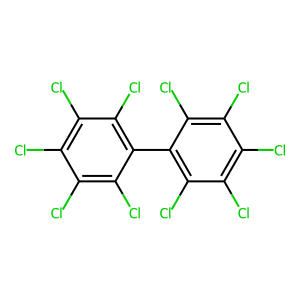

In [ ]:
mol = Chem.MolFromSmiles(df_final['SMILES'][116])
Draw.MolToImage(mol)

In [ ]:
df_final['Log_sol'].argmax()

361

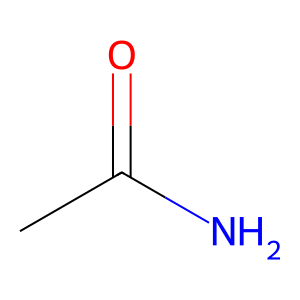

In [ ]:
mol = Chem.MolFromSmiles(df_final['SMILES'][361])
Draw.MolToImage(mol)

In [ ]:
df_final['Compound ID'][361]

<Figure size 400x600 with 0 Axes>

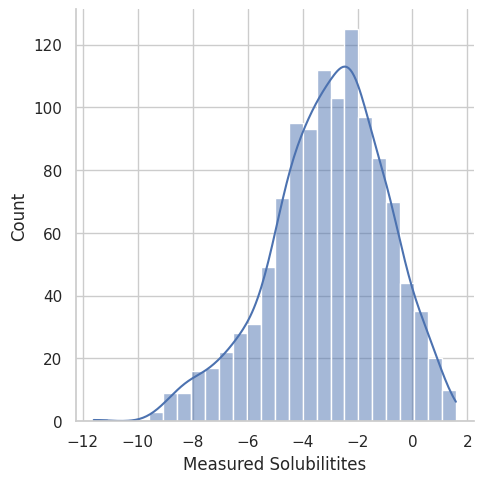

In [ ]:
plt.figure(figsize=(4,6))
sns.displot(df_final, x='Log_sol', kde=True)
plt.xlabel('Measured Solubilitites');
plt.savefig('dist_solubility.png', dpi=200, bbox_inches='tight')

In [ ]:
corr = df_final.corr()
corr

Log_sol       ABC     nBase   SpMAD_A     VR1_A  nAromAtom  \
Log_sol      1.000000 -0.587292  0.009436 -0.400888 -0.042746  -0.489810   
ABC         -0.587292  1.000000  0.026669  0.518070  0.269720   0.485949   
nBase        0.009436  0.026669  1.000000 -0.022689 -0.003478   0.011546   
SpMAD_A     -0.400888  0.518070 -0.022689  1.000000  0.034976   0.614815   
VR1_A       -0.042746  0.269720 -0.003478  0.034976  1.000000  -0.031358   
...               ...       ...       ...       ...       ...        ...   
JGI8        -0.381077  0.649665  0.010402  0.284155  0.063713   0.276180   
JGI9        -0.296588  0.604904  0.018965  0.210123  0.073997   0.189807   
JGI10       -0.284985  0.568986 -0.002792  0.173100  0.094727   0.142253   
Lipinski     0.536947 -0.403142  0.025631 -0.200843 -0.136917  -0.317888   
GhoseFilter -0.319041  0.580382  0.039911  0.307161 -0.029163   0.277967   

               nSpiro  nBridgehead   nHetero        nN        nO        nS  \
Log_sol      0.009736    -0.095359 -0.179433  0.066841  0.059156 -0.061972   
ABC          0.047461     0.103426  0.622045  0.256624  0.595782  0.102728   
nBase       -0.006465    -0.008918  0.053709  0.150348 -0.009906  0.037553   
SpMAD_A      0.023255     0.063530  0.072628  0.132353  0.102470 -0.057751   
VR1_A       -0.003541    -0.004722  0.159333 -0.024607  0.274959 -0.012268   
...               ...          ...       ...       ...       ...       ...   
JGI8         0.016945    -0.035987  0.423663  0.152328  0.395114  0.122871   
JGI9         0.008003    -0.050169  0.353518  0.071457  0.414981  0.093717   
JGI10       -0.012563    -0.037981  0.300058  0.040651  0.398091  0.083977   
Lipinski     0.027918    -0.102014 -0.193421  0.174111 -0.095816  0.016757   
GhoseFilter  0.057683     0.020765  0.410917  0.364935  0.322723  0.220497   

                   nP        nF       nCl       nBr        nI     ATS0Z  \
Log_sol     -0.081202 -0.127937 -0.399321 -0.035298 -0.017184 -0.459590   
ABC          0.103285  0.200278  0.118983 -0.110249 -0.095551  0.385108   
nBase       -0.014915 -0.014002 -0.019362 -0.014413 -0.008798 -0.005877   
SpMAD_A     -0.041554 -0.041914 -0.032173 -0.136020 -0.066922  0.042021   
VR1_A       -0.008112 -0.003036 -0.016760 -0.007315 -0.006020  0.099407   
...               ...       ...       ...       ...       ...       ...   
JGI8         0.108066  0.131089  0.094306 -0.079201 -0.063015  0.268088   
JGI9         0.092732  0.145734  0.007082 -0.065195 -0.053448  0.215991   
JGI10        0.086245  0.150690 -0.050429 -0.046896 -0.041566  0.188676   
Lipinski    -0.064858 -0.052948 -0.399481  0.036216  0.037992 -0.317940   
GhoseFilter  0.187706  0.103354 -0.060140 -0.093152 -0.056862  0.178513   

              AATS0dv    AATS0Z   AATS0se    AATS0i    ATSC2c    ATSC4c  \
Log_sol     -0.044767 -0.075770 -0.000651  0.484488 -0.007366 -0.022459   
ABC          0.371215 -0.141466  0.132957 -0.184630  0.071857 -0.004108   
nBase        0.037223 -0.014363  0.015841  0.061889  0.075821  0.030142   
SpMAD_A      0.279693 -0.253236 -0.154324 -0.432233 -0.080326 -0.035017   
VR1_A        0.000897 -0.015457 -0.001829  0.011166 -0.018230 -0.028881   
...               ...       ...       ...       ...       ...       ...   
JGI8         0.173808 -0.084355  0.060934 -0.098776  0.048587 -0.056060   
JGI9         0.114948 -0.087733  0.020366 -0.028885 -0.007335 -0.052671   
JGI10        0.083876 -0.080362 -0.006089 -0.010704  0.018426 -0.056568   
Lipinski    -0.048695 -0.034753 -0.089982  0.294517  0.153158  0.126262   
GhoseFilter  0.218049 -0.138173  0.009133 -0.028352  0.310783  0.149008   

               ATSC5c    ATSC6c    ATSC7c    ATSC8c   ATSC1dv   ATSC2dv  \
Log_sol      0.033025 -0.005921 -0.063347  0.055003 -0.251400 -0.136296   
ABC         -0.107591 -0.010039  0.118128 -0.022835  0.632265  0.413326   
nBase       -0.021484  0.052255 -0.069085  0.055913  0.029077  0.056471   
SpMAD_A      0.019735 -0.065728  0.049903 -0.005983  0.238407 

In [ ]:
corr_sorted = abs(corr[['Log_sol']]).sort_values(by ='Log_sol', ascending=False)
corr_sorted = corr_sorted.iloc[1:5, :]
corr_sorted.rename(columns={'Log_sol' : 'correlation_coef'}, inplace=True)
corr_sorted

correlation_coef
FilterItLogS          0.863686
PEOE_VSA6             0.705928
RNCG                  0.627965
ABC                   0.587292

Text(0, 0.5, 'Correlation Coefficient')

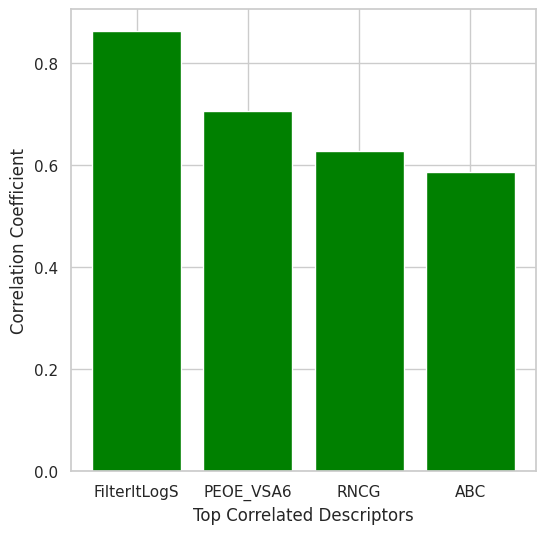

In [ ]:
fig = plt.figure(1, figsize=(6,6))
ax1 = fig.add_subplot(111)
plt.bar(x = corr_sorted.index, height = corr_sorted['correlation_coef'], color = 'green')
ax1.set_xlabel('Top Correlated Descriptors')
ax1.set_ylabel('Correlation Coefficient')

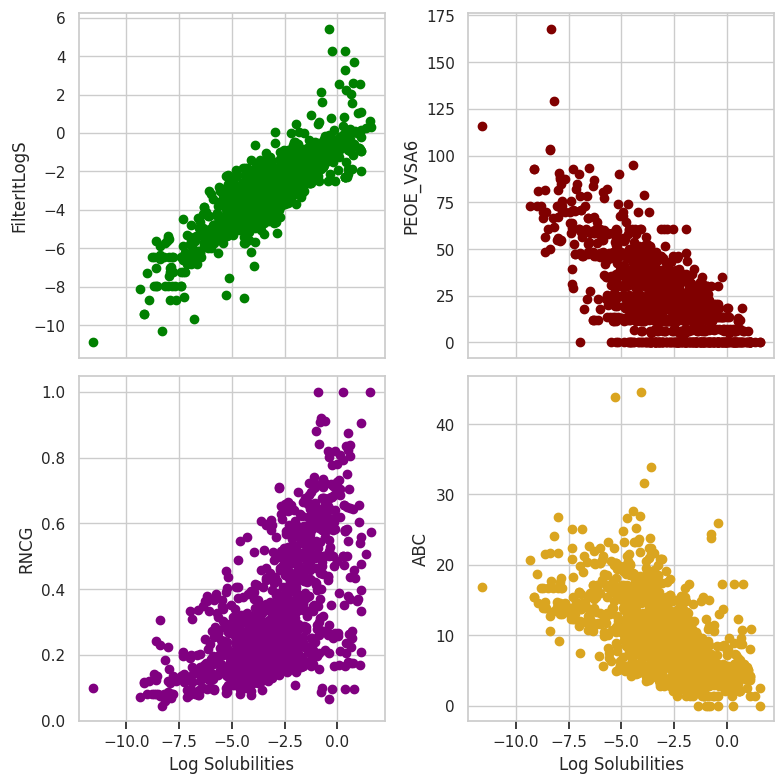

In [ ]:
plt.figure(figsize=(8,8))
color = ['green', 'maroon', 'purple', 'goldenrod']
for index, col in enumerate(['FilterItLogS', 'PEOE_VSA6', 'RNCG', 'ABC']):
  plt.subplot(2,2,index+1)
  plt.scatter(x = df_final['Log_sol'], y = df_final[col], color = color[index])
  plt.ylabel(col)
  plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
  if index>=2:
    plt.tick_params(axis='x', which='both', bottom=True, labelbottom=True)
    plt.xlabel('Log Solubilities')

plt.tight_layout()
plt.savefig('top_corr_des.png', dpi=200, bbox_inches='tight')

In [ ]:
# slice dataset based on 4 highly correlated descriptros
corr_4 = df_final[['FilterItLogS', 'PEOE_VSA6', 'RNCG', 'ABC', 'Log_sol']].corr()
corr_4

FilterItLogS  PEOE_VSA6      RNCG       ABC   Log_sol
FilterItLogS      1.000000  -0.711077  0.473776 -0.563685  0.863686
PEOE_VSA6        -0.711077   1.000000 -0.385994  0.291474 -0.705928
RNCG              0.473776  -0.385994  1.000000 -0.573222  0.627965
ABC              -0.563685   0.291474 -0.573222  1.000000 -0.587292
Log_sol           0.863686  -0.705928  0.627965 -0.587292  1.000000

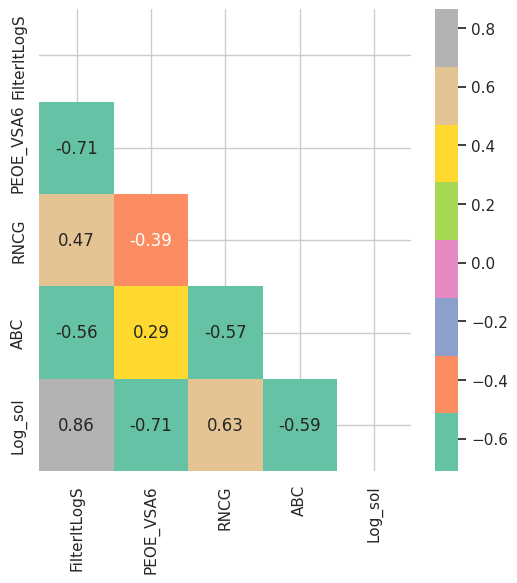

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_4, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(6,6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_4, mask=mask, cmap='Set2', annot=True)

# save figure
plt.savefig('corr_matrix.png', dpi=200, bbox_inches='tight')

In [ ]:
# df_final = pd.read_csv('delaney_mordred_truncated.csv')

## **Model Selection**

# **Model Screening using Lazypredict**

In [ ]:
%%capture
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyRegressor

In [ ]:
y = df_final['Log_sol']
scaled_DF = pd.DataFrame(StandardScaler().fit_transform(df_final.iloc[:,3:]), columns=([df_final.iloc[:,3:]]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_DF, y, test_size=0.20, random_state=2)

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(predictions)

 21%|██▏       | 9/42 [00:14<00:55,  1.69s/it]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 76%|███████▌  | 32/42 [00:34<00:03,  3.24it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.
QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


 98%|█████████▊| 41/42 [00:55<00:01,  1.71s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 41638
[LightGBM] [Info] Number of data points in the train set: 915, number of used features: 254
[LightGBM] [Info] Start training from score -3.090472


100%|██████████| 42/42 [00:57<00:00,  1.37s/it]

                                                          Adjusted R-Squared  \
Model                                                                          
Lars                          3268065562345685332296742612073545621045248.00   
RANSACRegressor                                                        59.37   
MLPRegressor                                                           15.98   
GaussianProcessRegressor                                               13.50   
KernelRidge                                                            10.02   
DummyRegressor                                                          5.33   
LassoLars                                                               3.06   
Lasso                                                                   3.06   
TweedieRegressor                                                        2.98   
PassiveAggressiveRegressor                                              2.80   
ElasticNet                              

## **Model Screening using Cross-validation**
https://youtu.be/3mBYqTPE4A8

In [ ]:
y = df_final['Log_sol']

In [ ]:
scaled_DF = pd.DataFrame(StandardScaler().fit_transform(df_final.iloc[:,3:]), columns=([df_final.iloc[:,3:]]))


In [ ]:
scaled_DF

ABC nBase SpMAD_A VR1_A nAromAtom nSpiro nBridgehead nHetero    nN  \
0    -1.05 -0.08   -2.07 -0.05     -1.00  -0.08       -0.12    0.22 -0.67   
1    -1.14 -0.08   -3.58 -0.05     -1.00  -0.08       -0.12   -0.13 -0.67   
2    -1.06 -0.08   -1.80 -0.05     -1.00  -0.08       -0.12    0.22 -0.67   
3    -1.22 -0.08   -1.40 -0.05     -1.00  -0.08       -0.12   -0.13 -0.67   
4    -0.73 -0.08   -2.68 -0.05     -1.00  -0.08       -0.12    0.93 -0.67   
...    ...   ...     ...   ...       ...    ...         ...     ...   ...   
1139  0.18 -0.08   -0.03 -0.04     -1.00  -0.08       -0.12    1.65  0.11   
1140  0.70 -0.08   -0.08 -0.04      0.15  -0.08       -0.12    0.93  0.11   
1141  1.41 -0.08    0.69 -0.03      2.06  -0.08       -0.12    0.22 -0.67   
1142  1.38 -0.08   -0.20 -0.04      1.30  -0.08       -0.12    1.65  0.88   
1143 -0.07 -0.08   -0.29 -0.05      0.15  -0.08       -0.12   -0.13  0.11   

        nO    nS    nP    nF   nCl   nBr    nI ATS0Z AATS0dv AATS0Z AATS0se  \
0    -0.84 -0.30 -0.19 -0.18  2.38 -0.19 -0.11  0.53   -1.04   1.54    2.67   
1    -0.84 -0.30 -0.19 -0.18  1.68 -0.19 -0.11  0.12   -1.17   1.03    1.68   
2    -0.84 -0.30 -0.19 -0.18  2.38 -0.19 -0.11  0.53   -1.11   1.54    2.67   
3    -0.84 -0.30 -0.19 -0.18  1.68 -0.19 -0.11  0.12   -1.32   1.03    1.68   
4    -0.84 -0.30 -0.19  5.65  1.68 -0.19 -0.11  0.47    4.68   1.45    6.83   
...    ...   ...   ...   ...   ...   ...   ...   ...     ...    ...     ...   
1139  1.29  3.74  4.73 -0.18 -0.41 -0.19 -0.11  0.70   -0.17  -0.05    0.16   
1140  0.76 -0.30 -0.19 -0.18  0.99 -0.19 -0.11  0.58    1.05   0.05    0.81   
1141  1.29 -0.30 -0.19 -0.18 -0.41 -0.19 -0.11  0.14    0.67  -0.26    0.01   
1142  1.29  1.72 -0.19 -0.18  0.29 -0.19 -0.11  0.86    0.69  -0.07    0.48   
1143  0.23 -0.30 -0.19 -0.18 -0.41 -0.19 -0.11 -0.44    0.17  -0.31   -0.17   

     AATS0i ATSC2c ATSC4c ATSC5c ATSC6c ATSC7c ATSC8c ATSC1dv ATSC2dv ATSC3dv  \
0     -0.08  -0.36  -0.06   0.16  -0.10   0.02  -0.01   -1.02   -0.51    0.48   
1      0.22  -0.11  -0.06   0.16  -0.10   0.02  -0.01   -0.96   -0.51    0.43   
2     -0.08  -0.51  -0.06   0.16  -0.10   0.02  -0.01   -1.04   -0.48    0.49   
3      0.22  -0.41  -0.06   0.16  -0.10   0.02  -0.01   -1.00   -0.45    0.46   
4      6.44  -1.14  -0.06   0.16  -0.10   0.02  -0.01   -0.91   -0.90    0.11   
...     ...    ...    ...    ...    ...    ...    ...     ...     ...     ...   
1139   0.38   0.80  -1.76   0.55   0.30  -3.03   6.43   -0.75    0.92   -0.07   
1140  -0.52   1.40   1.37  -1.61   0.73  -0.20   0.11    0.88    1.25    0.28   
1141  -0.83   0.18   2.01  -1.95   2.39  -1.91  -0.12    0.81    0.39    0.27   
1142  -0.23   1.16   1.09  -4.00   5.80  -4.39  -0.22   -0.18    1.45   -1.13   
1143   0.15   1.53   0.32  -0.80   0.93  -1.04   0.23    1.03    0.70   -0.48   

     ATSC4dv ATSC5dv ATSC6dv ATSC7dv ATSC8dv ATSC2d ATSC3d ATSC4d ATSC5d  \
0       0.64    0.48    0.25    0.18    0.06  -0.39   0.94   0.64   0.35   
1       0.64    0.48    0.25    0.18    0.06  -0.05   0.81   0.64   0.35   
2       0.64    0.48    0.25    0.18    0.06  -0.39   0.94   0.64   0.35   
3       0.64    0.48    0.25    0.18    0.06  -0.05   0.81   0.64   0.35   
4       0.64    0.48    0.25    0.18    0.06  -1.34   1.30   0.64   0.35   
...      ...     ...     ...     ...     ...    ...    ...    ...    ...   
1139   -3.23   -0.48    1.65    1.39    1.42  -0.69  -0.85  -0.17   1.02   
1140   -0.83   -1.27   -1.49   -0.30    0.99   0.29  -0.60   0.14  -0.14   
1141    1.09   -0.53   -1.29   -2.73   -0.28   1.07   0.49  -0.46  -1.53   
1142   -0.24    1.29    1.42   -2.91   -0.60  -0.26  -0.95   0.01   0.09   
1143   -0.55   -0.91    0.22   -1.84    0.87   0.44   0.23  -0.29  -0.42   

     ATSC6d ATSC7d ATSC8d ATSC1Z ATSC2Z ATSC3Z ATSC4Z ATSC5Z ATSC6Z ATSC7Z  \
0      0.23   0.07  -0.11  -0.53   0.35  -1.18   0.36   0.31   0.19   0.11   
1      0.23   0.07  -0.11  -0.28   2.99  -3.18   0.36   0.31   0.19   0.11   
2      0.23  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_DF, y, test_size=0.20, random_state=45)

In [ ]:
X_train.shape

In [ ]:
for model in [LinearRegression, SVR, RandomForestRegressor, ExtraTreesRegressor]:
  m = model()
  m.fit(X_train, y_train)
  val = cross_val_score(m, X_train, y_train,  scoring='r2', cv=5)
  print(f'The CV r2 score for {model.__name__} is : {val.mean()}')

The CV r2 score for LinearRegression is : -8.83836066075683e+23
The CV r2 score for SVR is : 0.8387084855726918
The CV r2 score for RandomForestRegressor is : 0.887064492903621
The CV r2 score for ExtraTreesRegressor is : 0.9055344575708058


In [ ]:
m = LinearRegression()
m.fit(X_train, y_train)
val = cross_val_score(m, X_train, y_train,  scoring='r2', cv=5)
print(f'The CV r2 score for {model.__name__} is : {val}')

The CV r2 score for ExtraTreesRegressor is : [ 8.82850197e-01  8.37239096e-01  8.03715764e-01 -4.41918033e+24
  6.78846295e-01]


In [ ]:
for model in [LinearRegression, SVR, RandomForestRegressor, ExtraTreesRegressor]:
  m = model()
  m.fit(X_train, y_train)
  print(f'The r2 score for {model.__name__} for train set is : {m.score(X_train, y_train)}')
  print(f'The r2 score for {model.__name__} for test set is : {m.score(X_test, y_test)}')

The r2 score for LinearRegression for train set is : 0.9526138008130901
The r2 score for LinearRegression for test set is : 0.6235904754965749
The r2 score for SVR for train set is : 0.9379971632199458
The r2 score for SVR for test set is : 0.8303985454143927
The r2 score for RandomForestRegressor for train set is : 0.9844142714281696
The r2 score for RandomForestRegressor for test set is : 0.8660119047461443
The r2 score for ExtraTreesRegressor for train set is : 1.0
The r2 score for ExtraTreesRegressor for test set is : 0.9027238248880212


## **Feaure Reduction and Model Evaluation**
https://youtu.be/Q0B4lp1d48s

In [ ]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)
print(f'The r2 score for train set is : {rf.score(X_train, y_train)}')
print(f'The r2 score for test set is : {rf.score(X_test, y_test)}')

The r2 score for train set is : 0.9849709730825061
The r2 score for test set is : 0.867977167635592


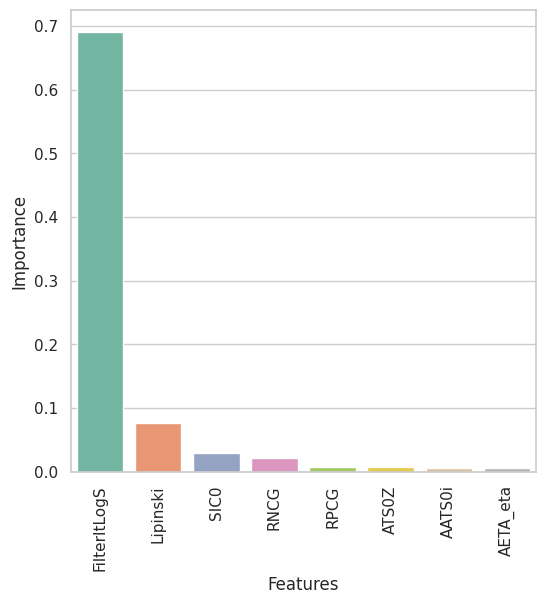

In [ ]:
# get importance
importance = rf.feature_importances_
# summarize feature importance
dicts = {
    'Features':[x for x in df_final.iloc[:,3:].columns],
    'Importance':importance
    }
DF_imp = pd.DataFrame(dicts)
DF_imp = DF_imp.sort_values('Importance',ascending=False)
DF_imp.to_excel('imp.xlsx', index=None)

# plot feature importance
top_desc_fi = DF_imp[:8]
plt.subplots(figsize=(6,6))
sns.barplot(data=top_desc_fi, x = 'Features', y='Importance', palette = 'Set2')
# plt.bar('Feature','Importance',data = DF_imp.iloc[:7,:])
plt.xticks(rotation = 90)
# plt.show()
plt.savefig('fi.png', dpi=200, bbox_inches='tight')

In [ ]:
DF_imp.head(7)

Features  Importance
153  FilterItLogS        0.69
279      Lipinski        0.08
151          SIC0        0.03
96           RNCG        0.02
97           RPCG        0.01
16          ATS0Z        0.01
20         AATS0i        0.01

In [ ]:
DF_imp[:8]['Features'].values

array(['FilterItLogS', 'Lipinski', 'SIC0', 'RNCG', 'RPCG', 'ATS0Z',
       'AATS0i', 'AETA_eta'], dtype=object)

In [ ]:
df_final_8 = df_final[DF_imp[:8]['Features'].values]

In [ ]:
delaney_8_des = pd.concat([df_final_8, y], axis=1)

In [ ]:
delaney_8_des.head()

FilterItLogS  Lipinski  SIC0  RNCG  RPCG  ATS0Z  AATS0i  AETA_eta  Log_sol
0         -2.79         1  0.50  0.33  0.55   1230  162.01      0.94    -2.18
1         -2.13         1  0.52  0.31  0.70    942  164.10      0.91    -2.00
2         -2.43         1  0.50  0.25  0.34   1230  162.01      0.90    -1.74
3         -2.15         1  0.52  0.37  0.36    942  164.10      0.78    -1.48
4         -2.66         1  0.52  0.28  0.53   1182  208.59      0.88    -3.04

 **Identify Optimal Descriptors: Sequential Addition**

In [ ]:
desc = delaney_8_des.columns.values
desc

array(['FilterItLogS', 'Lipinski', 'SIC0', 'RNCG', 'RPCG', 'ATS0Z',
       'AATS0i', 'AETA_eta', 'Log_sol'], dtype=object)

In [ ]:
y = delaney_8_des['Log_sol']
scores = []
for i in range(1,9):
  score = []
  df = delaney_8_des.iloc[:, :i]
  X = StandardScaler().fit_transform(df)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)
  rf = RandomForestRegressor(random_state=0)
  rf.fit(X_train, y_train)
  train = rf.score(X_train, y_train)
  score.append(train)
  test = rf.score(X_test, y_test)
  score.append(test)
  scores.append(score)



In [ ]:
scores

[[0.9625653723224489, 0.7126936223405373],
 [0.9645056944334274, 0.7159427489388839],
 [0.9754825203279608, 0.8128529542204412],
 [0.9803119981448878, 0.8278701976466968],
 [0.9815768192337464, 0.844555218997561],
 [0.9824713388165807, 0.8573345182898539],
 [0.9833176760507115, 0.8650514537343995],
 [0.9830908520920898, 0.8610225398427882]]

In [ ]:
df_seq = pd.DataFrame(scores, columns = ['Train', 'Test'], index = range(1,9)).round(3)

In [ ]:
pd.set_option('display.float_format', '{:.3f}'.format)
df_seq

Train  Test
1  0.963 0.713
2  0.965 0.716
3  0.975 0.813
4  0.980 0.828
5  0.982 0.845
6  0.982 0.857
7  0.983 0.865
8  0.983 0.861

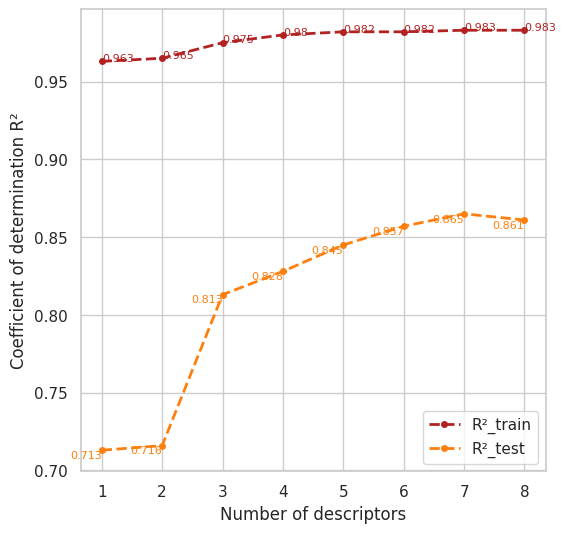

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
y1 = df_seq['Train']
y2 = df_seq['Test']
plt.plot(range(1,9),y1, label ='R\u00b2_train', marker='o', linestyle='dashed',
     linewidth=2, markersize=4, c = 'firebrick')
plt.plot(range(1,9),y2 , label= "R\u00b2_test", marker='o', linestyle='dashed',
     linewidth=2, markersize=4, c = '#ff7f0e' )

for i in range(1,9):
  ax.text(i, y1[i], y1[i], size=8, color='firebrick')

for i in range(1,9):
  ax.text(i, y2[i], y2[i], size=8, color='#ff7f0e', va='top', ha= 'right')

plt.xlabel("Number of descriptors")
plt.ylabel("Coefficient of determination R\u00b2" )
plt.legend()

plt.show()
fig.savefig('sequential.png', dpi=200, bbox_inches = 'tight')

## **Building Model using Reduced Number of Descriptros**

In [ ]:
delaney_8_des.head()

FilterItLogS  Lipinski  SIC0  RNCG  RPCG  ATS0Z  AATS0i  AETA_eta  Log_sol
0        -2.790         1 0.500 0.331 0.551   1230 162.008     0.942   -2.180
1        -2.130         1 0.520 0.312 0.695    942 164.102     0.913   -2.000
2        -2.434         1 0.500 0.250 0.335   1230 162.008     0.900   -1.740
3        -2.147         1 0.520 0.373 0.364    942 164.102     0.776   -1.480
4        -2.665         1 0.520 0.278 0.533   1182 208.591     0.875   -3.040

In [ ]:
delaney_8_des.columns

Index(['FilterItLogS', 'Lipinski', 'SIC0', 'RNCG', 'RPCG', 'ATS0Z', 'AATS0i',
       'AETA_eta', 'Log_sol'],
      dtype='object')

In [ ]:
df_final.head()

Compound ID               SMILES  Log_sol   ABC  nBase  \
0       1,1,1,2-Tetrachloroethane       ClCC(Cl)(Cl)Cl   -2.180 4.012      0   
1           1,1,1-Trichloroethane         CC(Cl)(Cl)Cl   -2.000 3.464      0   
2       1,1,2,2-Tetrachloroethane       ClC(Cl)C(Cl)Cl   -1.740 3.933      0   
3           1,1,2-Trichloroethane           ClCC(Cl)Cl   -1.480 3.047      0   
4  1,1,2-Trichlorotrifluoroethane  FC(F)(Cl)C(F)(Cl)Cl   -3.040 5.809      0   

   SpMAD_A  VR1_A  nAromAtom  nSpiro  nBridgehead  nHetero  nN  nO  nS  nP  \
0    0.970 11.637          0       0            0        4   0   0   0   0   
1    0.800  8.000          0       0            0        3   0   0   0   0   
2    1.000 11.530          0       0            0        4   0   0   0   0   
3    1.045  8.630          0       0            0        3   0   0   0   0   
4    0.901 17.882          0       0            0        6   0   0   0   0   

   nF  nCl  nBr  nI  ATS0Z  AATS0dv  AATS0Z  AATS0se  AATS0i  ATSC2c  ATSC4c  \
0   0    4    0   0   1230    2.802 153.750    9.603 162.008  -0.012   0.000   
1   0    3    0   0    942    2.352 117.750    8.933 164.102   0.043   0.000   
2   0    4    0   0   1230    2.552 153.750    9.603 162.008  -0.044   0.000   
3   0    3    0   0    942    1.852 117.750    8.933 164.102  -0.023   0.000   
4   3    3    0   0   1182   22.602 147.750   12.413 208.591  -0.182   0.000   

   ATSC5c  ATSC6c  ATSC7c  ATSC8c  ATSC1dv  ATSC2dv  ATSC3dv  ATSC4dv  \
0   0.000   0.000   0.000   0.000   -2.908   -5.972    2.859    0.000   
1   0.000   0.000   0.000   0.000   -1.257   -5.935    1.146    0.000   
2   0.000   0.000   0.000   0.000   -3.464   -5.022    3.464    0.000   
3   0.000   0.000   0.000   0.000   -2.368   -4.034    2.356    0.000   
4   0.000   0.000   0.000   0.000   -0.007  -19.367   -9.672    0.000   

   ATSC5dv  ATSC6dv  ATSC7dv  ATSC8dv  ATSC2d  ATSC3d  ATSC4d  ATSC5d  ATSC6d  \
0    0.000    0.000    0.000    0.000  -3.000   2.250   0.000   0.000   0.000   
1    0.000    0.000    0.000    0.000  -1.688   1.266   0.000   0.000   0.000   
2    0.000    0.000    0.000    0.000  -3.000   2.250   0.000   0.000   0.000   
3    0.000    0.000    0.000    0.000  -1.688   1.266   0.000   0.000   0.000   
4    0.000    0.000    0.000    0.000  -6.750   5.062   0.000   0.000   0.000   

   ATSC7d  ATSC8d  ATSC1Z   ATSC2Z   ATSC3Z  ATSC4Z  ATSC5Z  ATSC6Z  ATSC7Z  \
0   0.000   0.000 -18.062   61.250 -237.938   0.000   0.000   0.000   0.000   
1   0.000   0.000  -5.062  377.250 -570.938   0.000   0.000   0.000   0.000   
2   0.000   0.000 -18.062 -194.750   18.062   0.000   0.000   0.000   0.000   
3   0.000   0.000  -5.062 -134.750  -58.938   0.000   0.000   0.000   0.000   
4   0.000   0.000 -27.562  -68.750   11.562   0.000   0.000   0.000   0.000   

   ATSC8Z  ATSC1v   ATSC2v   ATSC3v  ATSC4v  ATSC5v  ATSC6v  ATSC7v  ATSC8v  \
0   0.000  -7.931   84.336 -276.802   0.000   0.000   0.000   0.000   0.000   
1   0.000 -24.260  394.752 -616.388   0.000   0.000   0.000   0.000   0.000   
2   0.000  -7.931 -200.396    7.931   0.000   0.000   0.000   0.000   0.000   
3   0.000 -24.260 -174.713  -46.923   0.000   0.000   0.000   0.000   0.000   
4   0.000  -4.107  -47.277  -16.794   0.000   0.000   0.000   0.000   0.000   

   ATSC1se  ATSC3se  ATSC4se  ATSC5se  ATSC6se  ATSC7se  ATSC8se  ATSC1p  \
0   -0.106   -0.673    0.000    0.000    0.000    0.000    0.000  -0.000   
1   -0.046   -1.708    0.000    0.000    0.000    0.000    0.000  -0.034   
2   -0.106    0.106    0.000    0.000    0.000    0.000    0.000  -0.000   
3   -0.046   -0.148    0.000    0.000    0.000    0.000    0.000  -0.034   
4   -0.553    0.484    0.000    0.000    0.000    0.000    0.000  -0.051   

   ATSC1i  ATSC2i  ATSC3i  ATSC5i  ATSC6i  ATSC7i  ATSC8i  AATSC1d  AATSC2Z  \
0  -2.068  -2.625   1.670   0.000   0.000   0.000   0.000   -0.464    5.104   
1  -2.301  -2.472   1.406   0.000   0.000   0.000   0.000   -0.502   31.438   
2  -2.068  -3.023   2

In [ ]:
delaney_7_des = df_final[['Compound ID', 'SMILES', 'FilterItLogS', 'Lipinski', 'SIC0', 'RNCG', 'RPCG', 'ATS0Z', 'AATS0i', 'Log_sol']]

In [ ]:
delaney_7_des.head()

Compound ID               SMILES  FilterItLogS  \
0       1,1,1,2-Tetrachloroethane       ClCC(Cl)(Cl)Cl        -2.790   
1           1,1,1-Trichloroethane         CC(Cl)(Cl)Cl        -2.130   
2       1,1,2,2-Tetrachloroethane       ClC(Cl)C(Cl)Cl        -2.434   
3           1,1,2-Trichloroethane           ClCC(Cl)Cl        -2.147   
4  1,1,2-Trichlorotrifluoroethane  FC(F)(Cl)C(F)(Cl)Cl        -2.665   

   Lipinski  SIC0  RNCG  RPCG  ATS0Z  AATS0i  Log_sol  
0         1 0.500 0.331 0.551   1230 162.008   -2.180  
1         1 0.520 0.312 0.695    942 164.102   -2.000  
2         1 0.500 0.250 0.335   1230 162.008   -1.740  
3         1 0.520 0.373 0.364    942 164.102   -1.480  
4         1 0.520 0.278 0.533   1182 208.591   -3.040

In [ ]:
delaney_7_des.to_csv('delaney_7_des.csv', index=None)

In [ ]:
delaney_7_des = pd.read_csv('delaney_7_des.csv')
delaney_7_des.head()

In [ ]:
train, test = train_test_split(delaney_7_des, test_size=0.20, random_state=45)

In [ ]:
test.head()

Compound ID  \
133                      2,2,4,6,6'-PCB   
46                  1,4-Dichlorobenzene   
849                     Monotropitoside   
1023  Reverse Transcriptase inhibitor 1   
513            cis 1,2-Dichloroethylene   

                                                 SMILES  FilterItLogS  \
133                  Clc1cc(Cl)c(c(Cl)c1)c2c(Cl)cccc2Cl        -7.213   
46                                       Clc1ccc(Cl)cc1        -3.002   
849   COC(=O)c1ccccc1OC2OC(COC3OCC(O)C(O)C3O)C(O)C(O...         1.634   
1023                    CCN2c1ncccc1N(C)C(=O)c3cccnc23         -3.279   
513                                           Cl\C=C/Cl        -1.117   

      Lipinski  SIC0  RNCG  RPCG  ATS0Z  AATS0i  Log_sol  
133          0 0.325 0.138 0.107   1882 149.405   -7.320  
46           1 0.407 0.250 0.190    798 153.063   -3.270  
849          0 0.260 0.099 0.073   1478 165.656   -0.742  
1023         1 0.312 0.197 0.167    778 163.466   -2.620  
513          1 0.613 0.500 0.415    652 159.957   -1.300

In [ ]:
X_train = train.iloc[:, 2:-1]
y_train = train.iloc[:, -1]
X_test = test.iloc[:,2:-1]
y_test = test.iloc[:,-1]

In [ ]:
X_train.head()

FilterItLogS  Lipinski  SIC0  RNCG  RPCG  ATS0Z  AATS0i
867         -0.820         1 0.495 0.289 0.305    538 169.195
627         -7.937         0 0.152 0.060 0.024    762 166.168
195         -0.868         1 0.335 0.824 0.354    216 167.075
1122        -1.782         1 0.564 0.393 0.511    940 157.164
847         -2.156         1 0.406 0.362 0.377    436 162.596

In [ ]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)
val = cross_val_score(rf, X_train, y_train,  scoring='r2', cv=5)
print(f'The CV r2 score is : {val.mean()}')
print(f'The r2 score for train set is : {rf.score(X_train, y_train)}')
print(f'The r2 score for test set is : {rf.score(X_test, y_test)}')

The CV r2 score is : 0.8774029003962335
The r2 score for train set is : 0.9833235776063283
The r2 score for test set is : 0.8653548589178629


In [ ]:
et = ExtraTreesRegressor(random_state=0)
et.fit(X_train, y_train)
val = cross_val_score(et, X_train, y_train,  scoring='r2', cv=5)
print(f'The CV r2 score is : {val.mean()}')
print(f'The r2 score for train set is : {et.score(X_train, y_train)}')
print(f'The r2 score for test set is : {et.score(X_test, y_test)}')

The CV r2 score is : 0.882680628734199
The r2 score for train set is : 0.9993033354917727
The r2 score for test set is : 0.8652163924200302


## **Hyperparameter Tuning**
https://youtu.be/4opdCj4ZaGQ

## **GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# rf = RandomForestRegressor(n_estimators=100,
#                            bootstrap=True,
#                            max_depth=None,
#                            max_features=1.0,
#                            min_samples_leaf=1,
#                            min_samples_split=2,
#                           )

In [ ]:
clf_rf = GridSearchCV(estimator=rf, param_grid = { 'n_estimators': [400, 600, 700, 800, 900],
                                                  'max_depth': [30, 45, 60, 75, 100, None],
                                                  'max_features': ['log2', 'sqrt'],
                                                  'min_samples_leaf': [2, 4],
                                                  'min_samples_split': [5, 10],
                                                  }, cv=3, verbose=0, scoring='r2')


In [ ]:
clf_rf.fit(X_train, y_train)

In [ ]:
pd.DataFrame(clf_rf.cv_results_).sort_values('mean_test_score', ascending=False).head(5)

In [ ]:
clf_rf.best_params_

In [ ]:
rf = RandomForestRegressor(
 max_depth= 30,
 max_features= 'log2',
 min_samples_leaf= 2,
 min_samples_split= 5,
 n_estimators= 900,
random_state=0)
rf.fit(X_train, y_train)
print(f'The r2 score for train set is : {rf.score(X_train, y_train)}')
print(f'The r2 score for test set is : {rf.score(X_test, y_test)}')

The r2 score for train set is : 0.9621476541628013
The r2 score for test set is : 0.8538377685604749


## **Predictions**

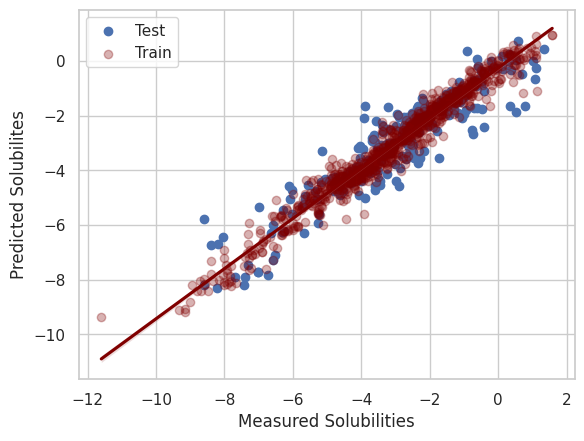

In [ ]:
plt.scatter(y_test, rf.predict(X_test), label='Test')
sns.regplot(x = y_train, y = rf.predict(X_train), color = 'maroon',scatter_kws={'alpha':0.3}, label='Train' )
plt.xlabel('Measured Solubilities')
plt.ylabel('Predicted Solubilites')
plt.legend();

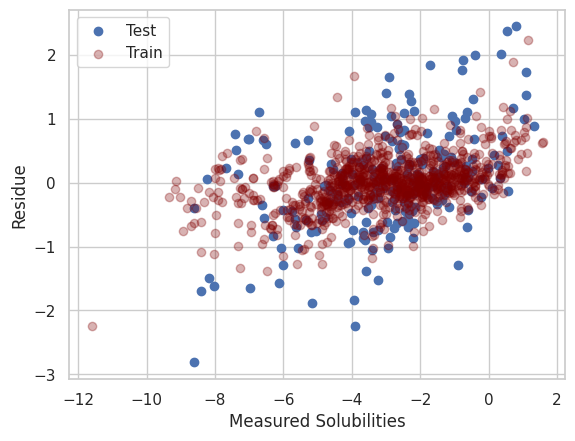

In [ ]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

plt.scatter(y_test, (y_test - y_pred_test), label='Test')
plt.scatter(y_train, (y_train - y_pred_train), c='maroon',label='Train', alpha = 0.3)
plt.xlabel('Measured Solubilities')
plt.ylabel('Residue')
plt.legend();

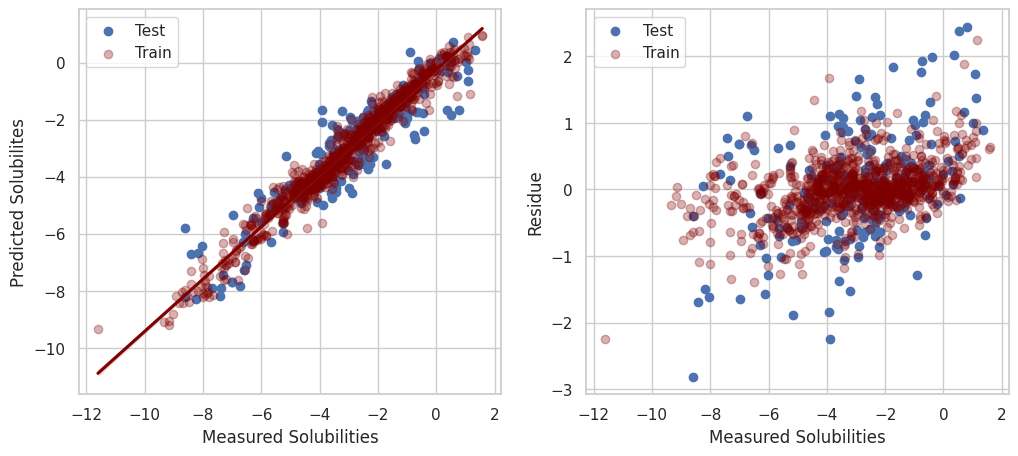

In [ ]:
plt.figure(figsize=(12,5))
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

plt.subplot(121)
plt.scatter(y_test, rf.predict(X_test), label='Test')
sns.regplot(x = y_train, y = rf.predict(X_train), color = 'maroon',scatter_kws={'alpha':0.3}, label='Train' )
plt.xlabel('Measured Solubilities')
plt.ylabel('Predicted Solubilites')
plt.legend();

plt.subplot(122)
plt.scatter(y_test, (y_test - y_pred_test), label='Test')
plt.scatter(y_train, (y_train - y_pred_train), c='maroon',label='Train', alpha = 0.3)
plt.xlabel('Measured Solubilities')
plt.ylabel('Residue')
plt.legend();
plt.savefig('vis.png', dpi=200, bbox_inches='tight')

In [ ]:
test.head()

Compound ID  \
133                      2,2,4,6,6'-PCB   
46                  1,4-Dichlorobenzene   
849                     Monotropitoside   
1023  Reverse Transcriptase inhibitor 1   
513            cis 1,2-Dichloroethylene   

                                                 SMILES  FilterItLogS  \
133                  Clc1cc(Cl)c(c(Cl)c1)c2c(Cl)cccc2Cl        -7.213   
46                                       Clc1ccc(Cl)cc1        -3.002   
849   COC(=O)c1ccccc1OC2OC(COC3OCC(O)C(O)C3O)C(O)C(O...         1.634   
1023                    CCN2c1ncccc1N(C)C(=O)c3cccnc23         -3.279   
513                                           Cl\C=C/Cl        -1.117   

      Lipinski  SIC0  RNCG  RPCG  ATS0Z  AATS0i  Log_sol  
133          0 0.325 0.138 0.107   1882 149.405   -7.320  
46           1 0.407 0.250 0.190    798 153.063   -3.270  
849          0 0.260 0.099 0.073   1478 165.656   -0.742  
1023         1 0.312 0.197 0.167    778 163.466   -2.620  
513          1 0.613 0.500 0.415    652 159.957   -1.300

In [ ]:
test.reset_index(drop=True, inplace=True)

In [ ]:
test_ = pd.concat([test, pd.DataFrame(y_pred_test, columns=['test_predictions'])], axis=1)

In [ ]:
test_

Compound ID  \
0                       2,2,4,6,6'-PCB   
1                  1,4-Dichlorobenzene   
2                      Monotropitoside   
3    Reverse Transcriptase inhibitor 1   
4             cis 1,2-Dichloroethylene   
..                                 ...   
224                          Lorazepam   
225                        Formetanate   
226                           Terbacil   
227                          1-Napthol   
228                         Erythritol   

                                                SMILES  FilterItLogS  \
0                   Clc1cc(Cl)c(c(Cl)c1)c2c(Cl)cccc2Cl        -7.213   
1                                       Clc1ccc(Cl)cc1        -3.002   
2    COC(=O)c1ccccc1OC2OC(COC3OCC(O)C(O)C3O)C(O)C(O...         1.634   
3                      CCN2c1ncccc1N(C)C(=O)c3cccnc23         -3.279   
4                                            Cl\C=C/Cl        -1.117   
..                                                 ...           ...   
224                OC3N=C(c1ccccc1Cl)c2cc(Cl)ccc2NC3=O        -5.064   
225                         CNC(=O)Oc1cccc(N=CN(C)C)c1        -2.132   
226                   Cc1[nH]c(=O)n(c(=O)c1Cl)C(C)(C)C        -2.862   
227                                    Oc1cccc2ccccc12        -2.414   
228                                       OCC(O)C(O)CO         1.560   

     Lipinski  SIC0  RNCG  RPCG  ATS0Z  AATS0i  Log_sol  test_predictions  
0           0 0.325 0.138 0.107   1882 149.405   -7.320            -7.458  
1           1 0.407 0.250 0.190    798 153.063   -3.270            -3.124  
2           0 0.260 0.099 0.073   1478 165.656   -0.742            -2.670  
3           1 0.312 0.197 0.167    778 163.466   -2.620            -3.148  
4           1 0.613 0.500 0.415    652 159.957   -1.300            -1.127  
..        ...   ...   ...   ...    ...     ...      ...               ...  
224         1 0.363 0.215 0.163   1354 157.445   -3.604            -4.566  
225         1 0.327 0.245 0.245    686 166.875   -2.340            -1.983  
226         1 0.372 0.238 0.252    852 166.912   -2.484            -3.076  
227         1 0.291 0.575 0.332    432 154.355   -2.220            -2.245  
228         1 0.344 0.252 0.135    410 172.120    0.700            -0.466  

[229 rows x 11 columns]

In [ ]:
test_['abs_res'] = abs(test_['Log_sol'] - test_['test_predictions']).round(2)

In [ ]:
test_.sort_values('abs_res', ascending=False, inplace=True)

In [ ]:
test_.head()

Compound ID                                      SMILES  FilterItLogS  \
113  Etofenprox  CCOc1ccc(cc1)C(C)(C)COCc3cccc(Oc2ccccc2)c3        -7.051   
167     Sucrose    OCC2OC(OC1(CO)OC(CO)C(O)C1O)C(O)C(O)C2O          3.675   
195    Dimecron            CCN(CC)C(=O)C(=CCOP(=O)(OC)OC)Cl        -1.864   
159      Thiram                     CN(C)C(=S)SSC(=S)N(C)C         -0.634   
97      Maltose     OCC1OC(OC2C(O)C(O)C(O)OC2CO)C(O)C(O)C1O         4.251   

     Lipinski  SIC0  RNCG  RPCG  ATS0Z  AATS0i  Log_sol  test_predictions  \
113         0 0.214 0.242 0.062   1120 158.998   -8.600            -5.785   
167         0 0.275 0.096 0.055   1158 169.549    0.790            -1.656   
195         1 0.349 0.178 0.249   1262 167.514    0.523            -1.854   
159         1 0.377 0.417 0.168   1350 159.649   -3.900            -1.655   
97          0 0.275 0.096 0.052   1158 169.549    0.358            -1.656   

     abs_res  
113    2.810  
167    2.450  
195    2.380  
159    2.240  
97     2.010

In [ ]:
PandasTools.AddMoleculeColumnToFrame(test_,'SMILES','Mol',includeFingerprints=False)


In [ ]:
test_.head()

Compound ID                                      SMILES  FilterItLogS  \
113  Etofenprox  CCOc1ccc(cc1)C(C)(C)COCc3cccc(Oc2ccccc2)c3        -7.051   
167     Sucrose    OCC2OC(OC1(CO)OC(CO)C(O)C1O)C(O)C(O)C2O          3.675   
195    Dimecron            CCN(CC)C(=O)C(=CCOP(=O)(OC)OC)Cl        -1.864   
159      Thiram                     CN(C)C(=S)SSC(=S)N(C)C         -0.634   
97      Maltose     OCC1OC(OC2C(O)C(O)C(O)OC2CO)C(O)C(O)C1O         4.251   

     Lipinski  SIC0  RNCG  RPCG  ATS0Z  AATS0i  Log_sol  test_predictions  \
113         0 0.214 0.242 0.062   1120 158.998   -8.600            -5.785   
167         0 0.275 0.096 0.055   1158 169.549    0.790            -1.656   
195         1 0.349 0.178 0.249   1262 167.514    0.523            -1.854   
159         1 0.377 0.417 0.168   1350 159.649   -3.900            -1.655   
97          0 0.275 0.096 0.052   1158 169.549    0.358            -1.656   

     abs_res                                               Mol  
113    2.810  <rdkit.Chem.rdchem.Mol object at 0x79b0f41e5e70>  
167    2.450  <rdkit.Chem.rdchem.Mol object at 0x79b0f41e5ee0>  
195    2.380  <rdkit.Chem.rdchem.Mol object at 0x79b0f41e5f50>  
159    2.240  <rdkit.Chem.rdchem.Mol object at 0x79b0f41e5fc0>  
97     2.010  <rdkit.Chem.rdchem.Mol object at 0x79b0f41e6030>

In [ ]:
img=Draw.MolsToGridImage(test_['Mol'][:5],molsPerRow=4,subImgSize=(200,200),legends=['Absolute error=' + str(x) for x in test_['abs_res'][:5]])

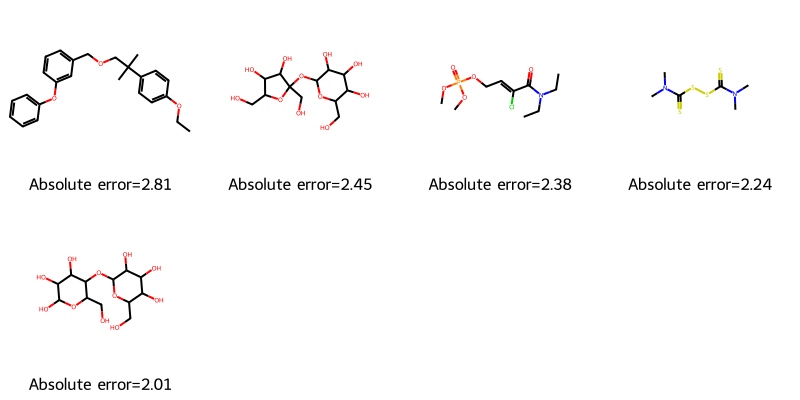

In [ ]:
img

In [ ]:
img=Draw.MolsToGridImage(test_['Mol'][-5:],molsPerRow=4,subImgSize=(200,200),legends=['Absolute error=' + str(x) for x in test_['abs_res'][-5:]])

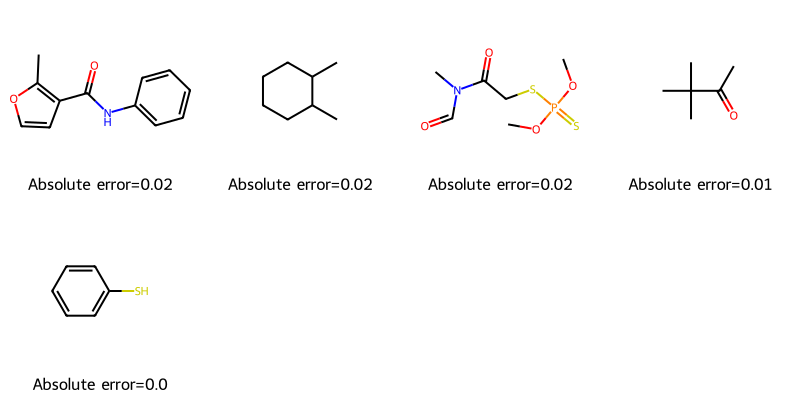

In [ ]:
img

## **Explainability**
https://youtu.be/Q0B4lp1d48s